In [1]:
using FundamentalsNumericalComputation
FNC.init_format()

┌ Info: verify download of index files...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:139
┌ Info: reading database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:69
┌ Info: writing database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:141


(section-matrixanaly-dimreduce)=
# Dimension reduction

```{index} singular value decomposition
```
```{index} dimension reduction
```

The SVD has another important property that proves very useful in a variety of applications. Let $\mathbf{A}$ be a real $m\times n$ matrix with SVD $\mathbf{A}=\mathbf{U}\mathbf{S}\mathbf{V}^T$ and (momentarily) $m\ge n$. Another way of writing the thin form of the SVD is

::::{math}
:label: svdsum
\begin{split}
  \mathbf{A} = \hat{\mathbf{U}}\hat{\mathbf{S}}\mathbf{V}^T &=
  \begin{bmatrix}
    \rule[-0.3em]{0pt}{1em} \mathbf{u}_1 & \mathbf{u}_2 & \cdots & \mathbf{u}_n
  \end{bmatrix} \:
  \begin{bmatrix}
    \sigma_1 & & \\
    & \ddots & \\
    & & \sigma_n
  \end{bmatrix} \: 
        \begin{bmatrix}
          \mathbf{v}_1^T \\ \vdots \\ \mathbf{v}_n^T
        \end{bmatrix}\ \\
  &=
  \begin{bmatrix}
    \rule[-0.3em]{0pt}{1em} \sigma_1\mathbf{u}_1  & \cdots & \sigma_n\mathbf{u}_n
  \end{bmatrix}\:
  \begin{bmatrix}
    \mathbf{v}_1^T \\ \vdots \\ \mathbf{v}_n^T
  \end{bmatrix} \\
  &= \sigma_1 \mathbf{u}_{1}\mathbf{v}_{1}^T + \cdots + \sigma_r \mathbf{u}_{r}\mathbf{v}_{r}^T = \sum_{i=1}^r \sigma_i \mathbf{u}_{i}\mathbf{v}_{i}^T,
\end{split}
::::

where $r$ is the rank of $\mathbf{A}$. The final formula also holds for the case $m<n$.

Each outer product $\mathbf{u}_{i}\mathbf{v}_{i}^T$ is a rank-1 matrix of unit 2-norm. Thanks to the ordering of singular values, then, Equation {eq}`svdsum` expresses $\mathbf{A}$ as a sum of decreasingly important contributions. This motivates the definition, for $1\le k \le r$,

```{math}
:label: svdlowrank
\mathbf{A}_k = \sum_{i=1}^k \sigma_i \mathbf{u}_{i}\mathbf{v}_{i}^T = \mathbf{U}_k \mathbf{S}_k \mathbf{V}_k^T,
```

where $\mathbf{U}_k$ and $\mathbf{V}_k$ are the first $k$ columns of $\mathbf{U}$ and $\mathbf{V}$, respectively, and $\mathbf{S}_k$ is the upper-left $k\times k$ submatrix of $\mathbf{S}$.

The rank of a sum of matrices is always less than or equal to the sum of the ranks, so $\mathbf{A}_k$ is a rank-$k$ approximation to $\mathbf{A}$. It turns out that $\mathbf{A}_k$ is the *best* rank-$k$ approximation of $\mathbf{A}$, as measured in the matrix 2-norm.

(theorem-best-rank-k)=
::::{proof:theorem}
Suppose $\mathbf{A}$ has rank $r$ and let $\mathbf{A}=\mathbf{U}\mathbf{S}\mathbf{V}^T$ be an SVD. Let $\mathbf{A}_k$ be as in {eq}`svdlowrank` for $1\le k < r$. Then

1. $\| \mathbf{A} - \mathbf{A}_k \|_2 = \sigma_{k+1}, \quad k=1,\ldots,r-1$, and
2. If the rank of $\mathbf{B}$ is $k$ or less, then $\| \mathbf{A}-\mathbf{B} \|_2\ge \sigma_{k+1}$.
::::

::::{proof:proof}
(part 1 only) Note that {eq}`svdlowrank` is identical to {eq}`svdsum` with $\sigma_{k+1},\ldots,\sigma_r$ all set to zero. This implies that
  
```{math}
\mathbf{A} - \mathbf{A}_k = \mathbf{U}(\mathbf{S}-\hat{\mathbf{S}})\mathbf{V}^T,
```

where $\hat{\mathbf{S}}$ has those same values of $\sigma_i$ replaced by zero. But that makes the above an SVD of $\mathbf{A} - \mathbf{A}_k$, with singular values $0,\ldots,0,\sigma_{k+1},\ldots,\sigma_r$, the largest of which is $\sigma_{k+1}$. That proves the first claim.
::::

## Compression

If the singular values of $\mathbf{A}$ decrease sufficiently rapidly, then $\mathbf{A}_{k}$ may capture the most significant behavior of the matrix for a reasonably small value of $k$.


```{index} image (as a matrix)
```

(demo-dimreduce-hello)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

We make an image from some text, then reload it as a matrix.

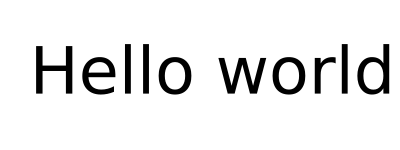

In [2]:
plot(annotations=(0.5,0.5,text("Hello world",44,:center,:middle)),
    grid=:none,frame=:none,size=(400,150))
savefig("hello.png")
img = load("hello.png")
A = @. Float64(Gray(img))
Gray.(A)

Next we show that the singular values decrease until they reach zero (more precisely, until they are about $\epsilon_\text{mach}$ times the norm of the matrix) at around $k=45$.

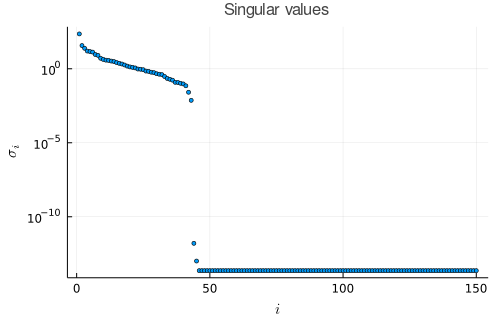

In [3]:
U,σ,V = svd(A)
scatter(σ,xaxis=(L"i"), yaxis=(:log10,L"\sigma_i"),
    title="Singular values")

The rapid decrease suggests that we can get fairly good low-rank approximations.

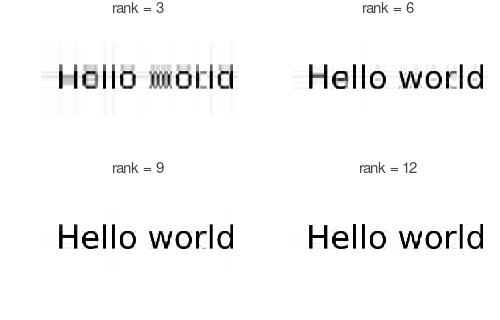

In [4]:
plt = plot(layout=(2,2),frame=:none,aspect_ratio=1,titlefontsize=10)
for i in 1:4
    k = 3i
    Ak = U[:,1:k]*diagm(σ[1:k])*V[:,1:k]'
    plot!(Gray.(Ak),subplot=i,title="rank = $k")
end
plt

Consider how little data is needed to reconstruct these images. For rank-9, for instance, we have 9 left and right singular vectors plus 9 singular values, for a compression ratio of better than 12:1.

In [5]:
m,n = size(A)
compression = m*n / (9*(m+n+1))

12.099213551119178

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```


## Capturing major trends

The use of dimension reduction offered by low-rank SVD approximation goes well beyond simply reducing computation time. By isolating the most important contributions to the matrix, dimension reduction can uncover deep connections and trends that are otherwise obscured by weaker effects and noise.

One useful way to quantify the decay in the singular values is to compute

```{math}
:label: sing-val-decay
s_k = \sum_{i=1}^k \sigma_i^2, \quad \tau_k = \frac{s_k}{s_r}, \quad k=1,\ldots,r.
```

Clearly $0\le \tau_k \le 1$ and $\tau_k$ is non-decreasing as a function of $k$. We can think of $\tau_k$ as the fraction of energy (or in statistical terms, variance) contained in the singular values up to and including the $k$th.[^expvar] 

[^expvar]: In statistics this quantity may be interpreted as the fraction of explained variance.

(demo-dimreduce-voting)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

This matrix describes the votes on bills in the 111th session of the United States Senate. (The data set was obtained from [https://voteview.com].) Each row is one senator, and each column is a vote item.

In [6]:
@load "voting.jld2" A;

If we visualize the votes (yellow is "yea," blue is "nay"), we can see great similarity between many rows, reflecting party unity.

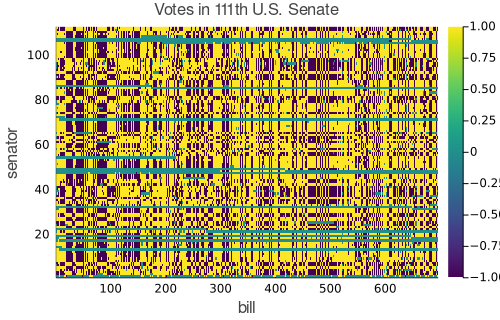

In [7]:
heatmap(A,color=:viridis,
    title="Votes in 111th U.S. Senate",xlabel="bill",ylabel="senator")

We use {eq}`sing-val-decay` to quantify the decay rate of the values.

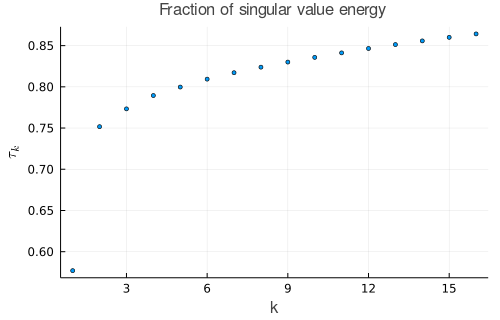

In [8]:
U,σ,V = svd(A)
τ = cumsum(σ.^2) / sum(σ.^2)
scatter(τ[1:16], xaxis=("k"), yaxis=(L"\tau_k"), 
    title="Fraction of singular value energy")

The first and second singular triples contain about 58% and 17%, respectively, of the energy of the matrix. All others have far less effect, suggesting that the information is primarily two-dimensional. The first left and right singular vectors also contain interesting structure.

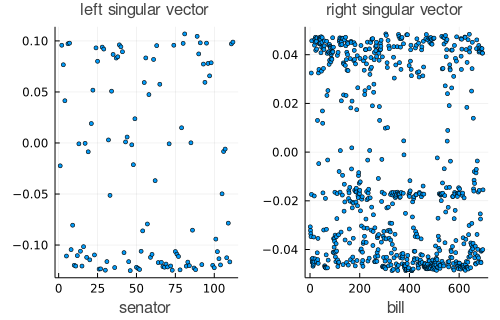

In [9]:
scatter( U[:,1],label="",layout=(1,2),
    xlabel="senator" ,title="left singular vector")
scatter!( V[:,1],label="",subplot=2,
    xlabel="bill",title="right singular vector")

Both vectors have values greatly clustered near $\pm C$ for a constant $C$. These can be roughly interpreted as how partisan a particular senator or bill was, and for which political party. Projecting the senators' vectors into the first two $\mathbf{V}$-coordinates gives a particularly nice way to reduce them to two dimensions. Political scientists label these dimensions *partisanship* and *bipartisanship*. Here we color them by actual party affiliation (also given in the data file): red for Republican, blue for Democrat, and yellow for independent.

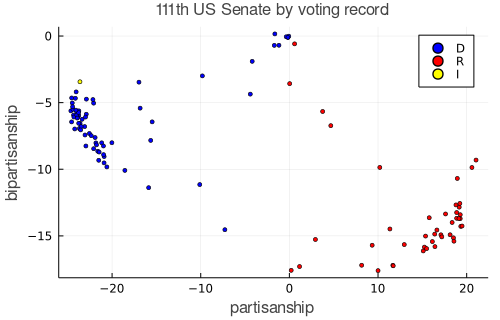

In [10]:
x1 = A*V[:,1];   x2 = A*V[:,2];

@load "voting.jld2" Rep Dem Ind
Rep = vec(Rep); Dem = vec(Dem);  Ind = vec(Ind);
scatter(x1[Dem],x2[Dem],color=:blue,label="D",
    xaxis=("partisanship"),yaxis=("bipartisanship"),title="111th US Senate by voting record" )
scatter!(x1[Rep],x2[Rep],color=:red,label="R")
scatter!(x1[Ind],x2[Ind],color=:yellow,label="I")

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

Not all data sets can be reduced effectively to a small number of dimensions, but as {numref}`Demo {number} <demo-dimreduce-voting>` illustrates, in some cases reduction reveals information that corresponds to real-world understanding.

## Exercises

1. ✍  Suppose that $\mathbf{A}$ is an $n\times n$ matrix. Explain why $\sigma_n$ is the distance (in 2-norm) from $\mathbf{A}$ to the set of all singular matrices.

2. ✍ Suppose $\mathbf{A}$ is a $7\times 4$ matrix and the eigenvalues of $\mathbf{A}^*\mathbf{A}$ are 3, 4, 7, and 10. How close is $\mathbf{A}$ in the 2-norm to (a) a rank-3 matrix? (b) a rank-2 matrix? 

3. 
    **(a)** ⌨ Find the rank-1 matrix closest to 
    
    $$
    \mathbf{A}=\displaystyle \begin{bmatrix}
    1 & 5 \\ 5 & 1
    \end{bmatrix},
    $$
    
    as measured in the 2-norm.

    **(b)** ⌨ Repeat part (a) for 
    
    $$
    \mathbf{A}=\displaystyle \begin{bmatrix}
    1 & 5 \\ 0 & 1
    \end{bmatrix}.
    $$

4. ✍ Find the rank-1 matrix closest to 
   
    $$
    \mathbf{A}=\displaystyle \begin{bmatrix}
    1 & b \\ b & 1
    \end{bmatrix},
    $$
  
    as measured in the 2-norm, where $b>0$.

5. ⌨ Following {numref}`Demo %s <demo-dimreduce-hello>` as a guide, load the "mandrill" test image and convert it to a matrix of floating-point pixel grayscale intensities. Using the SVD, display as images the best approximations of rank 5, 10, 15, and 20.